# Media Literacy Insights from the PEW Research Foundation's American Trends Panel: Wave 68

As a first step, I imported all the libraries I thought I might need. I did come back at one point to add more. What I discovered was that seaborn has some features that make plotting categorical data across multiple categories more manageable. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadstat
import seaborn as sns

%matplotlib inline

## Data Import
My next step was to load the data. I am not sure how useful this is, but I parsed it out so that I would have a version of the datafram with answers posed as ordinal values and keyes in as numerical codes as well as another version that displays the categorical answers. This dataset was created using SSPS (Statistical Package for the Social Sciences) which has a lot of built-in features for analysis, but can also be imported for use with python, using pyreadstat. It can be unpacked to the level of raw data and metadata associated with each columnar value. <br><br>
This dataset can be found online, categorized under social trends datasets. A free account is required to download PEW datasets. https://www.pewresearch.org/social-trends/?post_type=dataset

In [2]:
w68spssord, metapassord = pyreadstat.read_sav('~/Desktop/cap1/pew_w68_media_literacy_insights/data/W68.sav')

After the import, I wanted to get a quick look at the table. I called 'w68spssord' to see the numerically coded answers listed under each heading

In [3]:
w68spssord

,QKEY,INTERVIEW_START_W68,INTERVIEW_END_W68,DEVICE_TYPE_W68,LANG_W68,FLOYDFOL_W68,FLOYDDISC_W68,FLOYDCOVER_W68,FLOYDATTN_W68,FLOYDATTN2_a_W68,...,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,F_INC_TIER2,F_HISP_ORIGIN,F_YEARSINUS,F_PARTYSUMIDEO,FLAG_W68,WEIGHT_W68
0,1.001970e+05,2020-06-07 01:05:26,2020-06-07 19:16:00,3.0,1.0,2.0,3.0,1.0,3.0,3.0,...,1.0,3.0,1.0,1.0,2.0,6.0,1.0,3.0,2.0,0.312835
1,1.002600e+05,2020-06-07 01:35:17,2020-06-07 01:58:45,3.0,1.0,2.0,3.0,4.0,3.0,3.0,...,1.0,1.0,1.0,2.0,2.0,6.0,1.0,1.0,2.0,0.649902
2,1.003140e+05,2020-06-06 13:29:46,2020-06-06 13:50:23,2.0,1.0,2.0,4.0,2.0,3.0,1.0,...,1.0,3.0,1.0,1.0,2.0,6.0,1.0,2.0,2.0,0.432899
3,1.003630e+05,2020-06-05 17:46:39,2020-06-05 17:57:00,2.0,1.0,2.0,3.0,3.0,3.0,2.0,...,1.0,3.0,1.0,1.0,3.0,6.0,1.0,3.0,2.0,0.389315
4,1.004460e+05,2020-06-05 18:37:31,2020-06-05 18:49:38,1.0,1.0,2.0,2.0,2.0,3.0,3.0,...,1.0,4.0,1.0,1.0,2.0,6.0,1.0,4.0,2.0,0.284810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,2.019011e+11,2020-06-10 00:39:12,2020-06-10 00:48:50,2.0,1.0,2.0,2.0,4.0,1.0,3.0,...,1.0,5.0,1.0,2.0,1.0,3.0,1.0,4.0,2.0,0.134519
9650,2.019011e+11,2020-06-05 18:19:24,2020-06-05 18:41:08,2.0,2.0,1.0,3.0,2.0,1.0,3.0,...,1.0,3.0,1.0,2.0,1.0,3.0,4.0,2.0,1.0,0.263669
9651,2.019011e+11,2020-06-05 17:39:48,2020-06-05 18:09:53,2.0,2.0,1.0,2.0,3.0,1.0,1.0,...,1.0,3.0,1.0,2.0,1.0,5.0,4.0,2.0,1.0,1.664526
9652,2.019011e+11,2020-06-09 15:47:03,2020-06-09 15:54:43,2.0,2.0,3.0,4.0,3.0,3.0,2.0,...,NaN,2.0,1.0,1.0,1.0,5.0,99.0,9.0,1.0,0.613067


Although I end up not using the ordinal-valued dataframe in the rest of my analysis, I think it is important to see that I did convert this to a dataframe in anticipation of a possible use with more sophisticated evaluation. 

In [4]:
df68ord = pd.DataFrame(w68spssord)

This is how I imported the dataset to show categorical values written in a more readable format. This saves me time, referring to the documentation I have on each question's possible answers. 

In [5]:
w68spss, metaspss = pyreadstat.read_sav('~/Desktop/cap1/pew_w68_media_literacy_insights/data/W68.sav'
                                        , apply_value_formats = True
                                        , formats_as_category = True )

The dataset I imported has 146 columns. Most of those are not directly related to my line of inquiry. There are questions about racial tensions in the U.S., political candidates, ways in which the pandemic has changed lifestyles, and more. Before making the dataframe I will work with through the exploration of this dataset, I chose to limit the columns to those representing questions related to news consumption and getting information that is trustworthy about COVID-19. One set of questions that was of special interest to me was a series of three questions relating to a conspiracy theory and the viral video, called "Plandemic", that championed that theory. This struck me as a very interesting question because, as a professional teaching information literacy, I was shocked to see this form of disinformation spread so quickly. 

In [6]:
fields = ['COVIDFOL_W68', 
          'COVIDCOVER1_W68', 
          'COVIDFACTS_b_W68', 
          'COVIDNEWSCHNG_a_W68', 
          'COVIDNEWSCHNG_c_W68', 
          'COVIDNEWSCHNG_d_W68',
          'COVIDNEWSCHNG_e_W68',
          'COVIDINFODIFF_W68', 
          'COVIDLOCINFO_W68',
          'COVIDDEAL_W68', 
          'COVIDPLANHRD_W68', 
          'COVIDPLANTRUE_W68', 
          'COVIDPLANWATCH_W68', 
          'F_METRO', 
          'F_EDUCCAT',
          'F_PARTY_FINAL']

In [7]:
df68 = pd.DataFrame(w68spss)

In [8]:
df68 = pd.read_spss('~/Desktop/cap1/pew_w68_media_literacy_insights/data/W68.sav', usecols=fields)

In [9]:
df68.head()

,COVIDFOL_W68,COVIDCOVER1_W68,COVIDFACTS_b_W68,COVIDDEAL_W68,COVIDNEWSCHNG_a_W68,COVIDNEWSCHNG_c_W68,COVIDNEWSCHNG_d_W68,COVIDNEWSCHNG_e_W68,COVIDINFODIFF_W68,COVIDLOCINFO_W68,COVIDPLANHRD_W68,COVIDPLANTRUE_W68,COVIDPLANWATCH_W68,F_METRO,F_EDUCCAT,F_PARTY_FINAL
0,Very closely,Very well,Most of the time,Made a SMALLER deal than it really is,Spending MORE time getting news about the outb...,Finding it EASIER to understand what is happen...,No change,Finding it EASIER to identify what is true and...,Difficult to determine what is true and what i...,Plenty of news and information available,Nothing at all,NaN,NaN,Metropolitan,Some College,Democrat
1,Fairly closely,Not too well,Hardly ever,Made a BIGGER deal than it really is,No change,No change,No change,Finding it EASIER to identify what is true and...,Easy to determine what is true and what is not,Plenty of news and information available,Nothing at all,NaN,NaN,Metropolitan,College graduate+,Republican
2,Very closely,Somewhat well,Some of the time,Approached about right,No change,No change,Seeing FEWER partisan viewpoints in the news a...,Finding it HARDER to identify what is true and...,Easy to determine what is true and what is not,Plenty of news and information available,A little,Probably true,"No, did not watch it",Non-metropolitan,Some College,Republican
3,Very closely,Somewhat well,Most of the time,Approached about right,Spending LESS time getting news about the outb...,Finding it HARDER to understand what is happen...,Seeing FEWER partisan viewpoints in the news a...,No change,Difficult to determine what is true and what i...,Not enough news and information available,Nothing at all,NaN,NaN,Metropolitan,College graduate+,Democrat
4,Fairly closely,Somewhat well,Most of the time,Made a SMALLER deal than it really is,Spending LESS time getting news about the outb...,Finding it EASIER to understand what is happen...,No change,Finding it EASIER to identify what is true and...,Easy to determine what is true and what is not,Plenty of news and information available,A little,Probably NOT true,"No, did not watch it",Metropolitan,College graduate+,Democrat


After a first glance at the pared down dataset, now housed in a Pandas DataFrame, I decided that it would be useful to me to have these column names rendered in lower-case. 

In [10]:
df68.columns = [x.lower() for x in df68.columns]
fields = [x.lower() for x in fields]

In [11]:
df68.tail()

,covidfol_w68,covidcover1_w68,covidfacts_b_w68,coviddeal_w68,covidnewschng_a_w68,covidnewschng_c_w68,covidnewschng_d_w68,covidnewschng_e_w68,covidinfodiff_w68,covidlocinfo_w68,covidplanhrd_w68,covidplantrue_w68,covidplanwatch_w68,f_metro,f_educcat,f_party_final
9649,Fairly closely,Not too well,Some of the time,Made a SMALLER deal than it really is,Spending MORE time getting news about the outb...,Finding it HARDER to understand what is happen...,Seeing MORE partisan viewpoints in the news ab...,Finding it HARDER to identify what is true and...,Difficult to determine what is true and what i...,Not enough news and information available,A little,Probably NOT true,"No, did not watch it",Metropolitan,College graduate+,Democrat
9650,Very closely,Very well,Almost all of the time,Made a BIGGER deal than it really is,Spending LESS time getting news about the outb...,Finding it EASIER to understand what is happen...,No change,Finding it EASIER to identify what is true and...,Refused,Plenty of news and information available,A little,Probably NOT true,"No, did not watch it",Metropolitan,H.S. graduate or less,Republican
9651,Very closely,Very well,Most of the time,Approached about right,Spending MORE time getting news about the outb...,No change,Seeing FEWER partisan viewpoints in the news a...,Finding it EASIER to identify what is true and...,Easy to determine what is true and what is not,Plenty of news and information available,A lot,Probably true,"No, did not watch it",Metropolitan,H.S. graduate or less,Independent
9652,Not at all closely,Not too well,Some of the time,Made a SMALLER deal than it really is,Spending LESS time getting news about the outb...,Finding it EASIER to understand what is happen...,Seeing FEWER partisan viewpoints in the news a...,Finding it EASIER to identify what is true and...,Difficult to determine what is true and what i...,Not enough news and information available,Nothing at all,NaN,NaN,Metropolitan,H.S. graduate or less,Something else
9653,Fairly closely,Very well,Some of the time,Approached about right,Spending LESS time getting news about the outb...,Finding it EASIER to understand what is happen...,No change,No change,Difficult to determine what is true and what i...,Plenty of news and information available,A little,Definitely true,"No, did not watch it",Metropolitan,H.S. graduate or less,Something else


The next step I took might have been very inefficient, but I wanted to see both the list of possible answers and the answer counts for each question. I did this for the survey questions and the demographic profile points I chose to test. As a note on the demograpics, I chose to test the influence of party affiliation, education level and the metropolitan/non-metropolitan status of those surveyed in order to examine my assumptions that those whould be the most influential factors in how these questions I've chosen from the survey would be answered. If I were to automate this analysis, I would likely include more demographic points to see if there are any correlations that surprise me. <br><br>I named each value count so that I could easily call it if I wanted to see the tabulation. In addition, I named the total count for each column because I discovered that not all survey participants answered all questions. I was concerned that if I did percentage calculations, I would need an easy way to call the number of participants who answered each question. As it turns out, the cross tabulation method I use later does this automatically, so that is a step I didn't need to do. 

In [12]:
follow = df68.covidfol_w68.value_counts(sort=True)
followtot = df68.covidfol_w68.count()
follow

Very closely          4616
Fairly closely        4205
Not too closely        693
Not at all closely     108
Refused                 32
Name: covidfol_w68, dtype: int64

In [13]:
coverage = df68.covidcover1_w68.value_counts(sort=True)
coveragetot = df68.covidcover1_w68.count()
coverage

Somewhat well      4193
Very well          3033
Not too well       1454
Not at all well     871
Refused             103
Name: covidcover1_w68, dtype: int64

In [14]:
factsright = df68.covidfacts_b_w68.value_counts(sort=True)
factsrighttot = df68.covidfacts_b_w68.count()
factsright

Most of the time          3934
Some of the time          3222
Hardly ever               1304
Almost all of the time     909
Not sure                   249
Refused                     36
Name: covidfacts_b_w68, dtype: int64

In [15]:
timeonnews = df68.covidnewschng_a_w68.value_counts(sort=True)
timeonnewstot = df68.covidnewschng_a_w68.count()
timeonnews

Spending LESS time getting news about the outbreak    5642
No change                                             2619
Spending MORE time getting news about the outbreak    1320
Refused                                                 73
Name: covidnewschng_a_w68, dtype: int64

In [16]:
keepingup = df68.covidnewschng_c_w68.value_counts(sort=True)
keepinguptot = df68.covidnewschng_c_w68.count()
keepingup

Finding it EASIER to understand what is happening with the outbreak    3462
No change                                                              3202
Finding it HARDER to understand what is happening with the outbreak    2902
Refused                                                                  88
Name: covidnewschng_c_w68, dtype: int64

In [17]:
partynews = df68.covidnewschng_d_w68.value_counts(sort=True)
partynewstot = df68.covidnewschng_d_w68.count()
partynews

Seeing MORE partisan viewpoints in the news about the outbreak     4714
No change                                                          2979
Seeing FEWER partisan viewpoints in the news about the outbreak    1796
Refused                                                             165
Name: covidnewschng_d_w68, dtype: int64

In [18]:
easyreal = df68.covidnewschng_e_w68.value_counts(sort=True)
easyrealtot = df68.covidnewschng_e_w68.count()
easyreal

Finding it HARDER to identify what is true and what is false about the outbreak    3476
No change                                                                          3098
Finding it EASIER to identify what is true and what is false about the outbreak    2997
Refused                                                                              83
Name: covidnewschng_e_w68, dtype: int64

In [19]:
infodiff = df68.covidinfodiff_w68.value_counts(sort=True)
infodifftot = df68.covidinfodiff_w68.count()
infodiff

Difficult to determine what is true and what is not    4841
Easy to determine what is true and what is not         4652
Refused                                                 161
Name: covidinfodiff_w68, dtype: int64

In [20]:
locinfo = df68.covidlocinfo_w68.value_counts(sort=True)
localinfotot = df68.covidlocinfo_w68.count()
locinfo

Plenty of news and information available     6379
Not enough news and information available    3090
Refused                                       185
Name: covidlocinfo_w68, dtype: int64

In [21]:
planhear = df68.covidplanhrd_w68.value_counts(sort=True)
planheartot = df68.covidplanhrd_w68.count()
planhear

A little          5383
Nothing at all    2797
A lot             1435
Refused             39
Name: covidplanhrd_w68, dtype: int64

In [22]:
plantrue = df68.covidplantrue_w68.value_counts(sort=True)
plantruetot = df68.covidplantrue_w68.count()
plantrue

Definitely NOT true    2229
Probably NOT true      1952
Probably true          1550
Not sure                735
Definitely true         342
Refused                  10
Name: covidplantrue_w68, dtype: int64

In [23]:
planwatch = df68.covidplanwatch_w68.value_counts(sort=True)
planwatchtot = df68.covidplanwatch_w68.count()
planwatch

No, did not watch it       5829
Yes, watched some of it     591
Yes, watched all of it      376
Refused                      22
Name: covidplanwatch_w68, dtype: int64

In [24]:
metro = df68.f_metro.value_counts(sort=True)
metrotot = df68.f_metro.count()
metro

Metropolitan        8615
Non-metropolitan    1039
Name: f_metro, dtype: int64

In [25]:
educat = df68.f_educcat.value_counts(sort=True)
educattot = df68.f_educcat.count()
educat

College graduate+        5432
Some College             2876
H.S. graduate or less    1328
Refused                    18
Name: f_educcat, dtype: int64

In [26]:
party = df68.f_party_final.value_counts(sort=True)
partytot = df68.f_party_final.count()
party

Democrat          3443
Independent       2858
Republican        2367
Something else     896
Refused             90
Name: f_party_final, dtype: int64

I tried iterating through the columns to get counts for each survey answer, but the result was messy. <br>
Still, I think the code is worth keeping in case I can figure out how to optimize it for better use. This is something I would do in a script and, aftetr lookin at the next step, where I visualize some of the columns' answer distributions, I would likely automate it to save each graph with the file name "{column} distribution.png" inside of my images file. 
```for column in df:
    print(df[column])```

Here is the basic documentation for how to plot this type of visualization: 
<br><br>
matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)

One thing I discovered while creating these graphs is that automation would result in pretty sloppy graphs. It makes sense to automate if you want to get a quick eyeball on each distribution, but then, if yoiu want to showcase that distribution, to customize that graph specifically. If I didn't customize this graph it would have a generic title, small x and y labels and the tics on hte x axis would have been illegible. I rotated them to 65 degrees to increase legibility. 

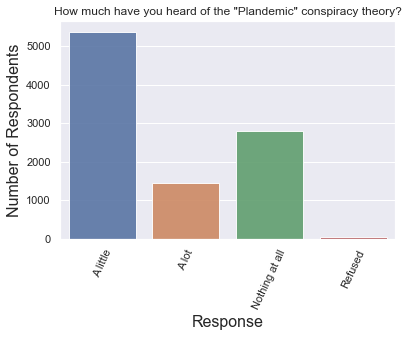

In [30]:
plantrue = df68['covidplanhrd_w68'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = plantrue.index, y = plantrue.values, alpha=0.9)

plt.title('How much have you heard of the "Plandemic" conspiracy theory?')
plt.ylabel('Number of Respondents', fontsize=16)
plt.xticks(rotation = 65)
plt.xlabel('Response', fontsize=16)
plt.show()

In [39]:
df68['covidplanhrd_w68'].value_counts(normalize=True) * 100

A little          55.759271
Nothing at all    28.972447
A lot             14.864305
Refused            0.403978
Name: covidplanhrd_w68, dtype: float64

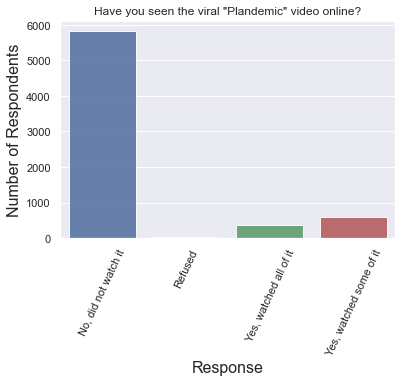

In [33]:
plantrue = df68['covidplanwatch_w68'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = plantrue.index, y = plantrue.values, alpha=0.9)

plt.title('Have you seen the viral "Plandemic" video online?')
plt.ylabel('Number of Respondents', fontsize=16)
plt.xticks(rotation = 65)
plt.xlabel('Response', fontsize=16)
plt.show()

In [37]:
df68['covidplanwatch_w68'].value_counts(normalize=True) * 100

No, did not watch it       85.494280
Yes, watched some of it     8.668231
Yes, watched all of it      5.514814
Refused                     0.322675
Name: covidplanwatch_w68, dtype: float64

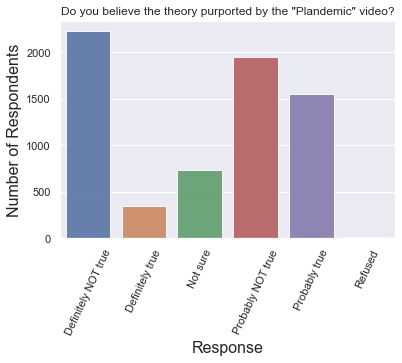

In [34]:
plantrue = df68['covidplantrue_w68'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = plantrue.index, y = plantrue.values, alpha=0.9)

plt.title('Do you believe the theory purported by the "Plandemic" video?')
plt.ylabel('Number of Respondents', fontsize=16)
plt.xticks(rotation = 65)
plt.xlabel('Response', fontsize=16)
plt.show()

While is is reassuring to see that big blue column showing that most people did not believe the consipracy theory put forth in the movie "plandemic" to be true, it's important to remember that this question was not asked of all those surveyed. It was only asked of those who had heard of it. When you look at this data in terms of percentages, the reassurance is not as strong. Just five percent of people believe it to be "definately true" and 22.7 percent of theose surveyed on this question believed that, based on the story told in "Plandemic", the pandemic was purposely created by powerful people. When you aggregate those who definately believe and those who believe it is probably true, it comes out to more than 25 percent. This is a startling illustration of the information literacy crisis we find ourselves in. 

In [35]:
df68['covidplantrue_w68'].value_counts(normalize=True) * 100

Definitely NOT true    32.692872
Probably NOT true      28.630097
Probably true          22.733940
Not sure               10.780287
Definitely true         5.016134
Refused                 0.146671
Name: covidplantrue_w68, dtype: float64

I am saving this block of code, though it didn't work, because I was trying to use a plot to visualize of those who live in a metropolitan area, how many chose each answer option. I would then go on to visualize the proportional response for rural inhabitants. This is important because metropolitan survey participants greatly outweigh rural participants and it would be important to see proportinos within the two populations. Unfortunately, so far I am unable to do that. If I had lots of time to fiddle with this, I would try to work out how to do this. It might mean pulling the data apart into seperate DataFrames for rural and metropolitan participants using SQL and a WHERE clause to differentiate that variable. 
<br>
<br>

```
groupedvalues=df68.groupby('f_metro').sum().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["covidplanhrd_w68"].argsort().argsort() 
g=sns.barplot(x=f_metro.value, y=covidplanhrd_w68.index ,data=groupedvalues, palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, color='black', ha="center")

plt.show()
```

Of all 9654 surveyed, 1432 had heard "a lot" about the theory portrayed in an online video entitled "Plandemic". That theory states that powerful people intentionally planned the coronavirus outbreak. I am curious about why certain people had hear a lot about this video and, as a follow-up to that question, of the people who had heard of this video, why might some of them have been more prone to believe the theory it proposed. 

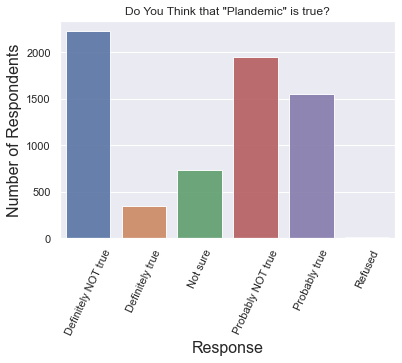

In [17]:
import matplotlib.pyplot as plt
planhrd = df68['covidplantrue_w68'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = planhrd.index, y = planhrd.values, alpha=0.9)

plt.title('Do You Think that "Plandemic" is true?')
plt.ylabel('Number of Respondents', fontsize=16)
plt.xticks(rotation = 65)
plt.xlabel('Response', fontsize=16)
plt.show()

This question was not posed to all those surveyed. In total, 6818 people answered this question. (Note to self, shouild I re-order the columns to Def NOT, Prob NOT, Prob true, Def true, not sure, refused?) Again, I notice that relatively few people believed this theory to be true, but a surprising amount of people thought that it could "probably" be true. What factors are involved in this belief? I am looking at not only demographics, but also other indicators as outlined in the survey questions. I am especially interested in the amound of news media consumed. Interestingly, this dataset includes several questions from previous waves that might be helpful in addressing these questions. They ask about news formats most often consumed, specific news outlets, and party alignment of the news that those surveyed most trust. 

This data is already in buckets.
<br>
If I were to look at one column such as 'f_agecat', I could run "df68.f_agecat.head()"
<br>
I would get an output listing the age brackets like this: 
```
0      65+
1      65+
2      65+
3    30-49
4    50-64
Name: f_agecat, dtype: category
Categories (5, object): ['18-29', '30-49', '50-64', '65+', 'Refused']
```

In [39]:
df68.f_agecat.head()

0      65+
1      65+
2      65+
3    30-49
4    50-64
Name: f_agecat, dtype: category
Categories (5, object): ['18-29', '30-49', '50-64', '65+', 'Refused']

I'm just keeping this call below to refer back to in case I needed to see this. It's a little frustrating, because the output is the column name and the first categorical title. What about the rest of them? Actually, looking back, I think it's because I have loc set to 0. 

In [43]:
headers = df68.loc[0]
headers[1:14]

covidfol_w68                                                Very closely
covidcover1_w68                                                Very well
coviddeal_w68                      Made a SMALLER deal than it really is
covidnewschng_a_w68    Spending MORE time getting news about the outb...
covidnewschng_c_w68    Finding it EASIER to understand what is happen...
covidnewschng_d_w68                                            No change
covidnewschng_e_w68    Finding it EASIER to identify what is true and...
covidinfodiff_w68      Difficult to determine what is true and what i...
covidcount_w68          A little higher than the actual number of deaths
covidcount2_w68                                          Not intentional
covidplanhrd_w68                                          Nothing at all
covidplantrue_w68                                                    NaN
covidplanwatch_w68                                                   NaN
Name: 0, dtype: object

In [45]:
headers[1:14].values

array(['Very closely', 'Very well',
       'Made a SMALLER deal than it really is',
       'Spending MORE time getting news about the outbreak',
       'Finding it EASIER to understand what is happening with the outbreak',
       'No change',
       'Finding it EASIER to identify what is true and what is false about the outbreak',
       'Difficult to determine what is true and what is not',
       'A little higher than the actual number of deaths',
       'Not intentional', 'Nothing at all', nan, nan], dtype=object)

I tried to do a categorically based scatter plot, but this would work better if one of the variables were continuous while the other is categorical. As my data presents, a scatter plot is of very limited use. It might be helpful in simply seeing a dramatic trend. For instance, I noticed that fewer of the youngest survey participants refused to anser the question about how closely they have follower the pandemic in the news. 

Ref for catplot video https://www.youtube.com/watch?v=vUmpqpb-FvA

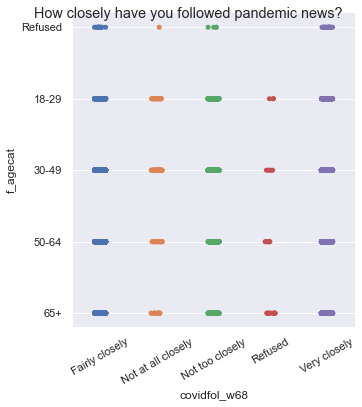

In [54]:
age_follow = sns.catplot('covidfol_w68', 'f_agecat', data=df68)
age_follow.fig.suptitle("How closely have you followed pandemic news?")
age_follow.set_xticklabels(rotation=30)

This chart does not do what I had hoped it would, but it does give insights into the patterns of refusal to answer questions. There were no respondents who refused both of these questions. It appears that the older the respondent was, the more likely they were to refuse to answer this question. (Note to self, how can I change this ugly title location?)

Here's another attempt at a scatterplot using level of belief in the plandemic consipracy theory and political party affiliation as my x and y axis. It is just further proof that this type of chart is of limited value in a dataset like mine. I experimented with jitter and it was not much of an improvement, unfortunately. 

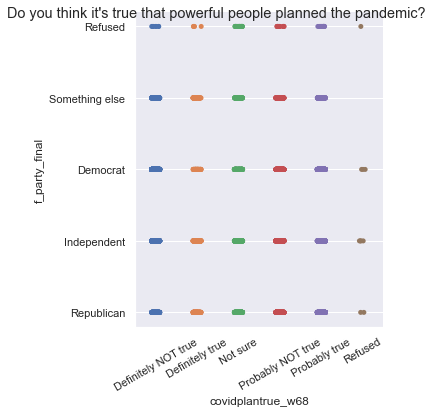

In [66]:
party_plan_true = sns.catplot('covidplantrue_w68', 'f_party_final', data=df68)
party_plan_true.fig.suptitle("Do you think it's true that powerful people planned the pandemic?")
party_plan_true.set_xticklabels(rotation=30)

The next type of plot I worked with was a bar chart. It is less visually exciting than some others I would have liked to see, but ultimately, it does a good job of portraying information while taking several factors into consideration. This first chart shows how likely you are to have believed that the "Plandemic" movie's theory is true, broken down by political party affiliation. I went through and did this same chart for each of the three demographic factors I chose to work with. 

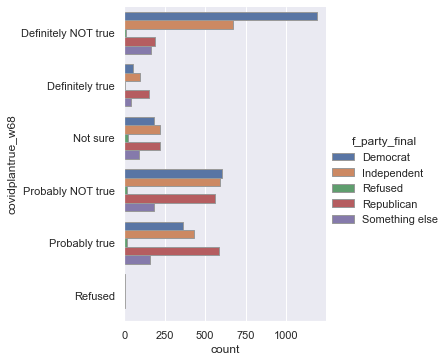

In [79]:
plan_party = sns.catplot(y= 'covidplantrue_w68',hue='f_party_final', kind="count",
            palette="deep", edgecolor=".6",
            data=df68)

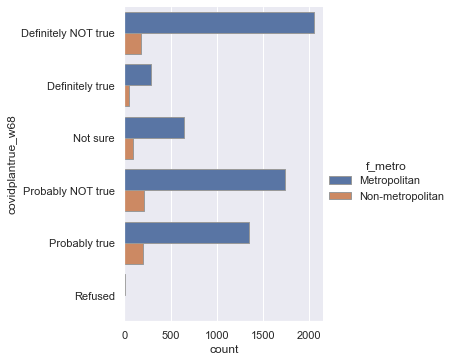

In [40]:
plan_metro = sns.catplot(y= 'covidplantrue_w68',hue='f_metro', kind="count",
            palette="deep", edgecolor=".6",
            data=df68)

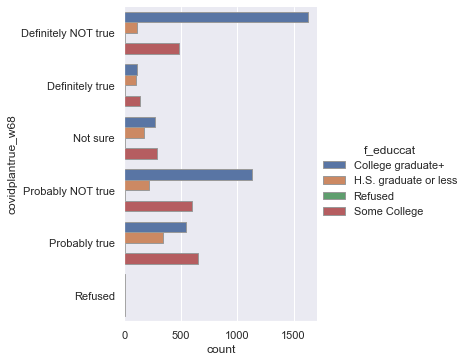

In [41]:
plan_edu = sns.catplot(y= 'covidplantrue_w68',hue='f_educcat', kind="count",
            palette="deep", edgecolor=".6",
            data=df68)

There is a problem with the two charts above. They simply chart the count. I want to chart the percentages from each demographic population. It is less apparent in the political party visualization because those categories are more close to a normal distribution, but city dwellers are more heavily represented here. They represent nearly 90 percent of respondents. The level of education is also not equally distributed. 

In [43]:
df68['f_metro'].value_counts(normalize=True) * 100

Metropolitan        89.237622
Non-metropolitan    10.762378
Name: f_metro, dtype: float64

In [42]:
df68['f_educcat'].value_counts(normalize=True) * 100

College graduate+        56.266832
Some College             29.790760
H.S. graduate or less    13.755956
Refused                   0.186451
Name: f_educcat, dtype: float64

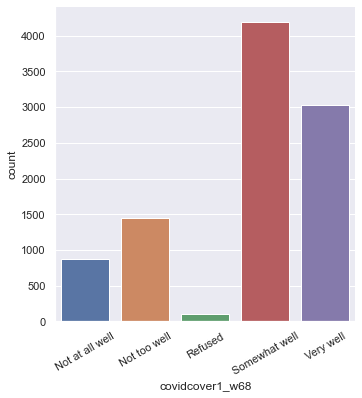

In [81]:
coverage_quality = sns.catplot(x='covidcover1_w68', kind="count", palette="deep", data = df68)
coverage_quality.set_xticklabels(rotation=30)

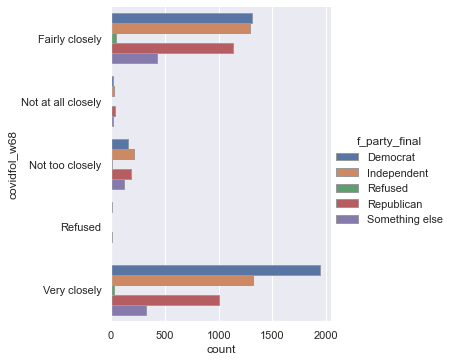

In [80]:
follow_party = sns.catplot(y= 'covidfol_w68',hue='f_party_final', kind="count",
            palette="deep", edgecolor=".6",
            data=df68)

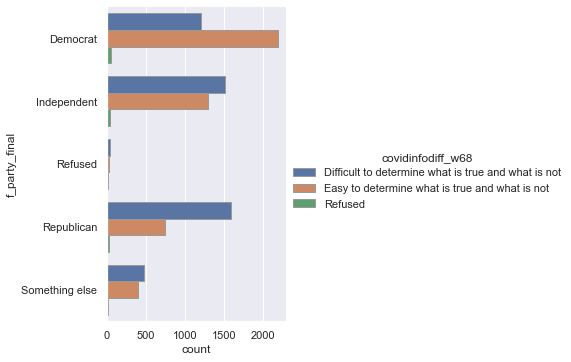

In [83]:
difficulty_party = sns.catplot(y= 'f_party_final',hue='covidinfodiff_w68', kind="count",
            palette="deep", edgecolor=".6",
            data=df68)

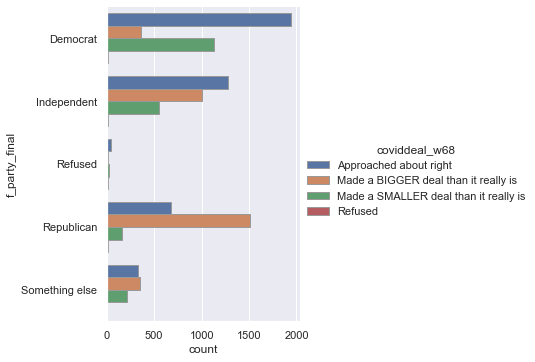

In [85]:
deal_party = sns.catplot(y= 'f_party_final',hue='coviddeal_w68', kind="count",
            palette="deep", edgecolor=".6",
            data=df68)

Here, I just want to make a note for my plans. 
<br>
I want to pick out some trends I notice from the plotting in order to apply some tests for statistical signifigance. 

Here, I just want to make a note for my plans.
I want to pick out some trends I notice from the plotting in order to apply some tests for statistical signifigance. <br> <br>
note for classmates: seaborn catplot is potentially really useful. I am sure I could make more use of it if I better understood the implications of using ordinal values in a plot. Right now, although these categories approach ordinality, they are not suitable for many kinds of plots. I wonder if I could insert a value count for x or y to make it work

```
sns.catplot(x="f_agecat", y="coviddeal_w68", hue="f_sex",
            col="f_party_final", aspect=.7,
            kind="swarm", data=df68)
```

Now, I am going to do cross-tabulation on all of the variables. For each survey question, I am going to tabulate against each of the three chosen demographic markers. This is where I really want to utilize scripts. One question I have is if I can output thoser scripts in a neat way in order to look at them all in one nicely arranged document. 

In [45]:
edu_follow = pd.crosstab([df68.f_educcat], [df68.covidfol_w68], normalize='index')
edu_follow

covidfol_w68,Fairly closely,Not at all closely,Not too closely,Refused,Very closely
f_educcat,,,,,
College graduate+,0.422680,0.005523,0.048233,0.002761,0.520803
H.S. graduate or less,0.449548,0.034639,0.134789,0.003765,0.377259
Refused,0.666667,0.000000,0.055556,0.000000,0.277778
Some College,0.452017,0.011127,0.087274,0.004172,0.445410


<AxesSubplot:title={'center':'Default by test class'}, xlabel='f_educcat'>

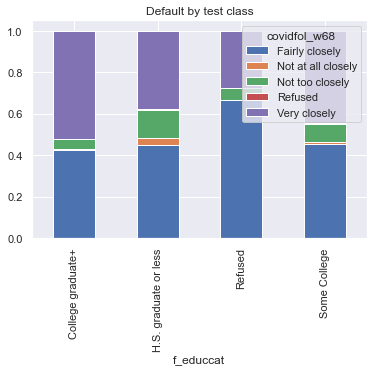

In [47]:
crosstab = pd.crosstab([df68.f_educcat], [df68.covidfol_w68])
crosstab_normalized = crosstab.div(crosstab.sum(1).astype(float), axis=0)
crosstab_normalized.plot(kind='bar', stacked=True, 
                   title='Default by ' + str("test") + ' class')    

<AxesSubplot:title={'center':'Proportion of answers by Education'}, xlabel='f_party_final'>

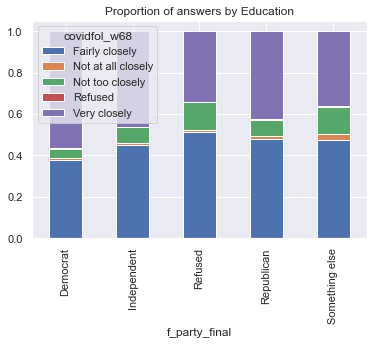

In [52]:
crosstab = pd.crosstab([df68.f_party_final], [df68.covidfol_w68], normalize='index')
crosstab_normalized = crosstab.div(crosstab.sum(1).astype(float), axis=0)
crosstab_normalized.plot(kind='bar', stacked=True, 
                   title='Proportion of answers by Education')

<AxesSubplot:title={'center':'Proportion of answers by Education'}, xlabel='f_metro'>

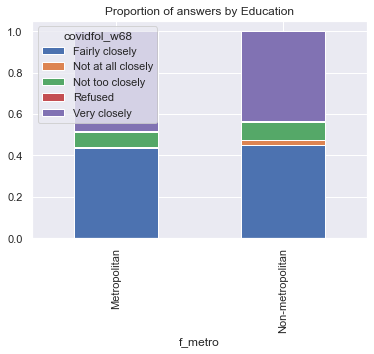

In [53]:
crosstab = pd.crosstab([df68.f_metro], [df68.covidfol_w68], normalize='index')
crosstab_normalized = crosstab.div(crosstab.sum(1).astype(float), axis=0)
crosstab_normalized.plot(kind='bar', stacked=True, 
                   title='Proportion of answers by Education')